# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with experimental data from the paper "The Many Faces of Human Sociality: Uncovering the Distribution and Stability of Social Preferences" by Bruhin, Fehr, and Schunk, published in the *Journal of the European Economic Association* 17(4): 1025-1069, 2019: https://doi.org/10.1093/jeea/jvy018

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. 2260326

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

The authors observe human behavior in the so-called dictator game: One player (*dictator*) receives a certain amount of money and can distribute this endowment between herself and another player (*receiver*). The decision of the dictator is implemented, and the receiver has no choice to take and must accept the dictator's decision. <br>
The authors employ a binary version of the dictator game in which the dictator can choose between two alternative allocation options *X* and *Y*. Each dictator in the experiment plays 30 of these dictator games with varying pairs of decision alternatives. <br>
All subjects in the experiment were students from the University of Zurich and the Swiss Federal Institute of Technology Zurich.

# Problem 1 - Data Handling
The basis of your work will be the following two datasets:
- `choices.csv` contains the decisions of the dictators across the 30 variations of the binary dictator game.
    - *sid* is the ID of the subject.
    - *gid* is the ID of the game variation.
    - *order* is the (random) order in which the game appeared in the block of dictator games.
    - *self_x* and *self_y* are the payoffs of the dictator in choice option X and Y, respectively.
    - *other_x* and *other_y* are the payoffs of the receiver in choice option X and Y, respectively.
    - *choice_x* describes the decision of the dictator, with a value of 1 representing the choice of option X, and 0 the choice of option Y.
    - *s_x* and *s_y* are indicators of disadvantageous inequality for the dictator in option X and option Y, respectively. That is, *s_x* equals 1 if the dictator receives lower payoff in option X than the receiver, and 0 if the dictator receive higher payoff in option X than the receiver. 
    - *r_x* and *r_y* are indicators of advantageous inequality for the dictator in option X and option Y, respectively. That is, *r_x* equals 1 if the dictator receives higher payoff in option X than the receiver, and 0 if the dictator receive lower payoff in option X than the receiver. 
    - Note that *r_x = 1 - s_x* and *r_y = 1 - s_y*
- `subjects.csv` contains the results from the post-experimental questionnaire.
    - *sid* is the ID of the subject.
    - *bf_consciousness, bf_openness, bf_extraversion, bf_agreeableness, bf_neuroticism* are the results from the Big Five measures.
    - *cogabil* is a measure of cognitive ability.
    - *pe_D1_stud_natsci, pe_D1_stud_law, pe_D1_stud_socsci, pe_D1_stud_med* indicate the subject's field of study (natural sciences, law, social sciences, or medicine, respectively).
    - *pe_monthinc* is the subject's monthly income.
    - *pe_age* is the subject's age.
    - *pe_female* equals 1 if the subject is female, and 0 otherwise.

In [2]:
choices = pd.read_csv("choices.csv", sep=",")
choices

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,r_y,r_x
0,102010050706,361,1,940,800,150,510,0,0,0,1,1
1,102010050706,281,2,970,770,490,170,0,0,0,1,1
2,102010050706,391,3,1060,680,330,330,1,0,0,1,1
3,102010050706,271,4,990,750,480,180,1,0,0,1,1
4,102010050706,311,5,930,810,510,150,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6781,172010050704,251,35,780,420,540,660,1,1,0,0,1
6782,172010050704,191,36,680,520,780,420,0,0,1,1,0
6783,172010050704,221,37,620,580,410,790,1,1,0,0,1
6784,172010050704,231,38,670,530,420,780,1,1,0,0,1


In [5]:
subjects = pd.read_csv("subjects.csv", sep=",")
subjects

,sid,bf_consciousness,bf_openness,bf_extraversion,bf_agreeableness,bf_neuroticism,cogabil,pe_D1_stud_natsci,pe_D1_stud_law,pe_D1_stud_socsci,pe_D1_stud_med,pe_monthinc,pe_age,pe_female
0,12010050501,9,17,4,11,-1,3,1,0,0,0,400,21,1
1,12010050502,5,22,4,7,7,7,1,0,0,0,800,21,0
2,12010050603,4,18,4,9,7,3,0,0,1,0,800,23,0
3,12010050704,8,17,1,10,7,9,1,0,0,0,500,22,0
4,12010050705,10,15,-3,12,0,4,0,0,0,1,350,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,312010050705,5,18,0,11,1,12,1,0,0,0,500,20,0
156,322010050501,6,18,8,8,8,6,0,0,0,1,450,20,1
157,332010050501,7,19,8,7,-1,6,0,0,0,1,600,20,0
158,342010050501,10,17,0,9,7,8,0,0,0,1,300,20,1


#### a)
Merge the two datasets into one. <br>
Check whether you have behavioral data (from `choices`) and personal information (from `subjects`) on all subjects. <br>
If not, create an indicator for missing data and list the IDs of the subjects concerned.

In [16]:
# Laden der Datensätze
choices = pd.read_csv("choices.csv", sep=",")
subjects = pd.read_csv("subjects.csv", sep=",")

# Überprüfen, ob 'sid' in beiden DataFrames vorhanden ist
if 'sid' in choices.columns and 'sid' in subjects.columns:
    # Zusammenführen der beiden Datensätze basierend auf der Teilnehmer-ID (sid)
    merged_data = pd.merge(choices, subjects, on='sid', how='outer', indicator=True)

    # Überprüfen, ob Daten fehlen
    missing_data = merged_data[merged_data['_merge'] != 'both']

    # Erstellen eines Indikators für fehlende Daten
    merged_data['missing_data'] = merged_data['_merge'] != 'both'

    # Auflisten der betroffenen Teilnehmer-IDs
    missing_subject_ids = missing_data['sid'].unique()

    # Anzeigen des zusammengeführten DataFrames
    print(merged_data.head())

    # Anzeigen der IDs mit fehlenden Daten
    print("IDs mit fehlenden Daten:", missing_subject_ids)

    # Speichern des zusammengeführten DataFrames in eine CSV-Datei
    merged_data.to_csv("merged_data_DL_problem1a.csv", index=False)

else:
    print("Die Spalte 'sid' ist nicht in beiden DataFrames vorhanden.")


           sid  gid  order  self_x  self_y  other_x  other_y  choice_x  s_y  \
0  12010050501  121      1     510     150      810      930         1    1   
1  12010050501  341      2     870     870      140      520         1    0   
2  12010050501  291      3     890     850      520      140         1    0   
3  12010050501  101      4     400     260      690     1050         1    1   
4  12010050501  351      5     890     850      140      520         1    0   

   s_x  ...  cogabil  pe_D1_stud_natsci  pe_D1_stud_law  pe_D1_stud_socsci  \
0    1  ...      3.0                1.0             0.0                0.0   
1    0  ...      3.0                1.0             0.0                0.0   
2    0  ...      3.0                1.0             0.0                0.0   
3    1  ...      3.0                1.0             0.0                0.0   
4    0  ...      3.0                1.0             0.0                0.0   

   pe_D1_stud_med  pe_monthinc  pe_age  pe_female  _merg

#### b)
Try out different representations of the data (long vs. wide etc.).

In [17]:
# Laden des zusammengeführten Datensatzes
merged_data = pd.read_csv("merged_data_DL_problem1a.csv")

# Anzeigen des geladenen Datensatzes
print("Geladener Datensatz:")
print(merged_data.head())

# Erstellen eines Wide-Formats
wide_format = merged_data.pivot_table(index='sid', columns='gid', values='choice_x', aggfunc='first')

# Anzeigen des Wide-Formats
print("Wide Format:")
print(wide_format.head())

# Erstellen eines Long-Formats
long_format = pd.melt(merged_data, id_vars=['sid', 'gid', 'order'], value_vars=['self_x', 'self_y', 'other_x', 'other_y', 'choice_x', 's_x', 's_y', 'r_x', 'r_y'], var_name='variable', value_name='value')

# Anzeigen des Long-Formats
print("Long Format:")
print(long_format.head())

# Speichern der Formate, falls erforderlich
wide_format.to_csv("wide_format_DL_1b.csv")
long_format.to_csv("long_format_DL_1b.csv")

Geladener Datensatz:
           sid  gid  order  self_x  self_y  other_x  other_y  choice_x  s_y  \
0  12010050501  121      1     510     150      810      930         1    1   
1  12010050501  341      2     870     870      140      520         1    0   
2  12010050501  291      3     890     850      520      140         1    0   
3  12010050501  101      4     400     260      690     1050         1    1   
4  12010050501  351      5     890     850      140      520         1    0   

   s_x  ...  cogabil  pe_D1_stud_natsci  pe_D1_stud_law  pe_D1_stud_socsci  \
0    1  ...      3.0                1.0             0.0                0.0   
1    0  ...      3.0                1.0             0.0                0.0   
2    0  ...      3.0                1.0             0.0                0.0   
3    1  ...      3.0                1.0             0.0                0.0   
4    0  ...      3.0                1.0             0.0                0.0   

   pe_D1_stud_med  pe_monthinc  pe_

# Problem 2 - Data Visualization
#### a)
As a first type of visualization, focus on the choices and the decision scenarios. <br>
That is, use the payoffs and indicators of (dis)advantageous inequality. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [6]:
# Insert your code here.

#### b)
Now also include the information on the subjects from the questionnaires in your plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [7]:
# Insert your code here.

# Problem 3 - Supervised Machine Learning
#### a)
Try to predict the choices of subjects using the information provided. <br>
Report the performance measures for different predictor variables.

In [8]:
# Insert your code here.

#### b)
Try to fill the gaps in the data using appropriate prediction models.

In [9]:
# Insert your code here.

#### c)
The questionnaire by Bruhin et al. comprises personality traits according to the Big Five. <br>
This question asks you to impute other (economic) preferences of the study participants. <br>
Examples include:
- Social preferences (inequity aversion, reciprocity, guilt aversion...)
- Time preferences (myopia, present bias...)
- Risk preferences
- ...

Your taks is thus the following:
1. Find a dataset on individuals that contains the Big Five along with other preference measures. Think of datasets used in scientific publications.
2. Train models to predict the other preferences from the Big Five. Evaluate their performance.
3. Make an out-of sample prediction using the fitted models to impute the preference measures for the study participants of Bruhin et al.

In [10]:
# Insert your code here.

# Problem 4 - Unsupervised Machine Learning 
Use subjects' behaviors and information from the questionnaire to cluster individuals. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified? <br>
Do the clusters change when you include the imputed preferences from Problem 3c)?

c:\Users\danny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

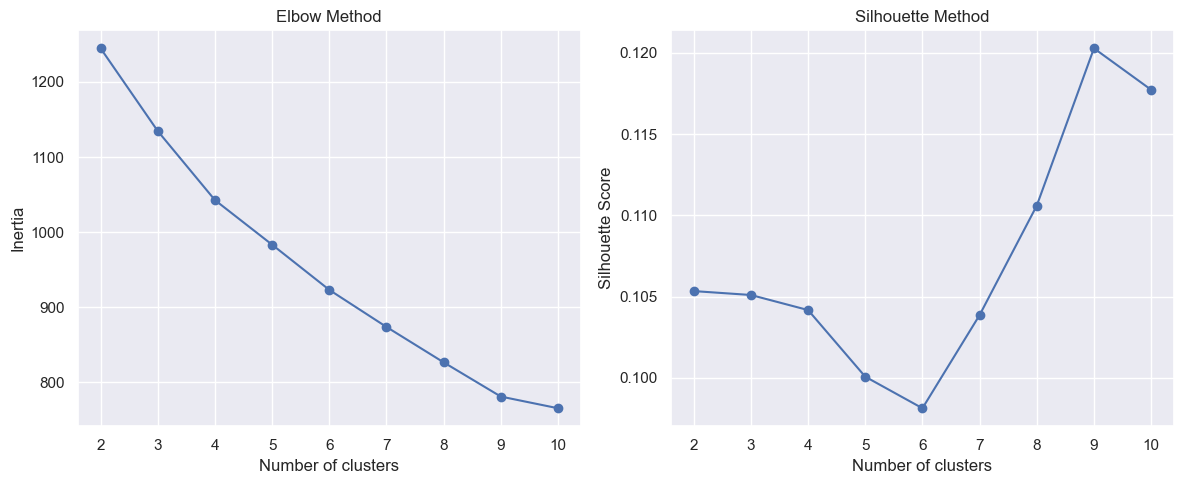


Cluster 0 characteristics:
bf_consciousness: 5.46
bf_openness: 23.54
bf_extraversion: 7.23
bf_agreeableness: 9.27
bf_neuroticism: 2.31
cogabil: 9.73
log_pe_monthinc: 6.32
pe_age: 20.88
pe_female: 0.38
choice_x: 0.87
self_x: 685.38
other_x: 635.38
s_x: 0.51
r_x: 0.49
pe_D1_stud_natsci: 0.81
pe_D1_stud_law: 0.08
pe_D1_stud_socsci: 0.08
pe_D1_stud_med: 0.00

Cluster 1 characteristics:
bf_consciousness: 6.14
bf_openness: 20.18
bf_extraversion: 2.55
bf_agreeableness: 9.32
bf_neuroticism: 3.64
cogabil: 4.91
log_pe_monthinc: 6.45
pe_age: 21.00
pe_female: 0.59
choice_x: 0.83
self_x: 685.38
other_x: 635.38
s_x: 0.51
r_x: 0.49
pe_D1_stud_natsci: 0.55
pe_D1_stud_law: 0.05
pe_D1_stud_socsci: 0.23
pe_D1_stud_med: 0.05

Cluster 2 characteristics:
bf_consciousness: 9.40
bf_openness: 22.32
bf_extraversion: 9.36
bf_agreeableness: 7.76
bf_neuroticism: 0.48
cogabil: 5.64
log_pe_monthinc: 6.73
pe_age: 21.88
pe_female: 0.56
choice_x: 0.85
self_x: 685.38
other_x: 635.38
s_x: 0.51
r_x: 0.49
pe_D1_stud_natsc

c:\Users\danny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
choices = pd.read_csv('choices.csv')
subjects = pd.read_csv('subjects.csv')

# Aggregate choices data
def aggregate_choices(choices):
    agg_data = choices.groupby('sid').agg({
        'choice_x': 'mean',  # Proportion of X choices
        'self_x': 'mean',  # Average payoff for self in X
        'other_x': 'mean',  # Average payoff for other in X
        's_x': 'mean',  # Proportion of disadvantageous inequality in X
        'r_x': 'mean'   # Proportion of advantageous inequality in X
    })
    return agg_data

agg_choices = aggregate_choices(choices)

# Merge with subjects data
merged_data = subjects.merge(agg_choices, on='sid')
data = merged_data.dropna()

data.to_csv("testDL.csv", index=False)


# Log-transform monthly income
data['log_pe_monthinc'] = np.log(data['pe_monthinc'] + 1)  # Adding 1 to avoid log(0)

# Select features for clustering
features = [
    'bf_consciousness', 'bf_openness', 'bf_extraversion', 'bf_agreeableness', 
    'bf_neuroticism', 'cogabil', 'log_pe_monthinc', 'pe_age', 'pe_female',
    'choice_x', 'self_x', 'other_x', 's_x', 'r_x',
    'pe_D1_stud_natsci', 'pe_D1_stud_law', 'pe_D1_stud_socsci', 'pe_D1_stud_med'
]

# Separate binary and non-binary features
binary_features = ['choice_x', 's_x', 'r_x', 'pe_female',
                   'pe_D1_stud_natsci', 'pe_D1_stud_law', 'pe_D1_stud_socsci', 'pe_D1_stud_med']
non_binary_features = [f for f in features if f not in binary_features]

# Normalize only the non-binary features
scaler = StandardScaler()
scaled_non_binary = scaler.fit_transform(data[non_binary_features])

# Combine scaled non-binary features with binary features
scaled_data = np.column_stack((scaled_non_binary, data[binary_features]))

# Determine optimal number of clusters
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

# Choose optimal k (you may need to adjust this based on the plots)
optimal_k = 9  # This is an example, adjust based on your results

# Perform final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
data['Cluster'] = clusters

# Interpret clusters
for i in range(optimal_k):
    print(f"\nCluster {i} characteristics:")
    cluster_data = data[data['Cluster'] == i]
    for feature in features:
        mean_value = cluster_data[feature].mean()
        print(f"{feature}: {mean_value:.2f}")

# Additional analysis of Big Five traits and study fields
print("\nBig Five traits analysis:")
for trait in ['bf_consciousness', 'bf_openness', 'bf_extraversion', 'bf_agreeableness', 'bf_neuroticism']:
    print(f"\n{trait}:")
    for i in range(optimal_k):
        cluster_mean = data[data['Cluster'] == i][trait].mean()
        print(f"  Cluster {i}: {cluster_mean:.2f}")

print("\nStudy field distribution:")
study_fields = ['pe_D1_stud_natsci', 'pe_D1_stud_law', 'pe_D1_stud_socsci', 'pe_D1_stud_med']
for field in study_fields:
    print(f"\n{field}:")
    for i in range(optimal_k):
        cluster_proportion = data[data['Cluster'] == i][field].mean()
        print(f"  Cluster {i}: {cluster_proportion:.2f}")